# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [173]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [118]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print the logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count + 1} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send GET request to OpenWeatherMap API
        response = requests.get(city_url)

        # If the response is successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON data
            city_weather = response.json()

            # Parse out the required data fields
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")

    # If an error is encountered, skip the city
    except Exception as e:
        print(f"Error occurred while processing {city}. Skipping...")
        print(e)
        pass

# Indicate that Data Retrieval is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df)


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | robertsport
Processing Record 4 of Set 1 | luena
Processing Record 5 of Set 1 | paveh
Processing Record 6 of Set 1 | nuuk
Processing Record 7 of Set 1 | abalak
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | las khorey
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | al jawf
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | at taj
Processing Record 18 of Set 1 | goksun
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | anadyr
Processing Record 23 of

Processing Record 41 of Set 4 | preobrazheniye
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | lubang
Processing Record 45 of Set 4 | flin flon
Processing Record 46 of Set 4 | eksjo
City not found. Skipping...
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | shelby
Processing Record 49 of Set 4 | hotan
Processing Record 50 of Set 4 | espargos
City not found. Skipping...
Processing Record 1 of Set 5 | homer
Processing Record 2 of Set 5 | arica
Processing Record 3 of Set 5 | howrah
Processing Record 4 of Set 5 | obo
Processing Record 5 of Set 5 | les anglais
Processing Record 6 of Set 5 | winchester
Processing Record 7 of Set 5 | abancay
Processing Record 8 of Set 5 | tvoroyri
Processing Record 9 of Set 5 | uray
Processing Record 10 of Set 5 | steamboat springs
Processing Record 11 of Set 5 | mili
Processing Record 12 of Set 5 | we
City not found. Skipping...
Processing Record 13 of Set 5 | chegdomyn
P

Processing Record 33 of Set 8 | tejen
Processing Record 34 of Set 8 | ndende
Processing Record 35 of Set 8 | saldanha
Processing Record 36 of Set 8 | afaahiti
Processing Record 37 of Set 8 | acarau
Processing Record 38 of Set 8 | lorengau
Processing Record 39 of Set 8 | tan-tan
Processing Record 40 of Set 8 | freetown
Processing Record 41 of Set 8 | turpan
Processing Record 42 of Set 8 | bubaque
Processing Record 43 of Set 8 | port blair
Processing Record 44 of Set 8 | nemuro
Processing Record 45 of Set 8 | el kala
Processing Record 46 of Set 8 | la passe
Processing Record 47 of Set 8 | massaguet
Processing Record 48 of Set 8 | taseyevo
Processing Record 49 of Set 8 | tshikapa
Processing Record 50 of Set 8 | mumford
Processing Record 1 of Set 9 | manas
Processing Record 2 of Set 9 | hood river
Processing Record 3 of Set 9 | novodvinsk
Processing Record 4 of Set 9 | la'ie
Processing Record 5 of Set 9 | masterton
Processing Record 6 of Set 9 | walvis bay
Processing Record 7 of Set 9 | ga

Processing Record 26 of Set 12 | bayganin
Processing Record 27 of Set 12 | awjilah
Processing Record 28 of Set 12 | paradera
City not found. Skipping...
Processing Record 29 of Set 12 | zhaogezhuang
Processing Record 30 of Set 12 | heniches'k
Processing Record 31 of Set 12 | sainte-suzanne
Processing Record 32 of Set 12 | chahuites
Processing Record 33 of Set 12 | shanhecun
Processing Record 34 of Set 12 | humaita
Processing Record 35 of Set 12 | bereket
Processing Record 36 of Set 12 | san antonio oeste
Processing Record 37 of Set 12 | port antonio
Processing Record 38 of Set 12 | n'zeto
Processing Record 39 of Set 12 | haimen
Processing Record 40 of Set 12 | bonthe
Processing Record 41 of Set 12 | abay
Processing Record 42 of Set 12 | camarillo
Processing Record 43 of Set 12 | eha amufu
Processing Record 44 of Set 12 | junin de los andes
Processing Record 45 of Set 12 | aioun
Processing Record 46 of Set 12 | cascais
-----------------------------
Data Retrieval Complete
--------------

In [119]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()




City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [120]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,34.88,99,99,5.61,GS,1685056055
1,new norfolk,-42.7826,147.0587,49.71,78,92,8.25,AU,1685056198
2,robertsport,6.7533,-11.3686,78.80,88,97,5.39,LR,1685056286
3,luena,-11.7833,19.9167,62.22,64,17,3.40,AO,1685056480
4,paveh,35.0434,46.3565,60.13,68,92,6.33,IR,1685056445


In [121]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [122]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,34.88,99,99,5.61,GS,1685056055
1,new norfolk,-42.7826,147.0587,49.71,78,92,8.25,AU,1685056198
2,robertsport,6.7533,-11.3686,78.80,88,97,5.39,LR,1685056286
3,luena,-11.7833,19.9167,62.22,64,17,3.40,AO,1685056480
4,paveh,35.0434,46.3565,60.13,68,92,6.33,IR,1685056445


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

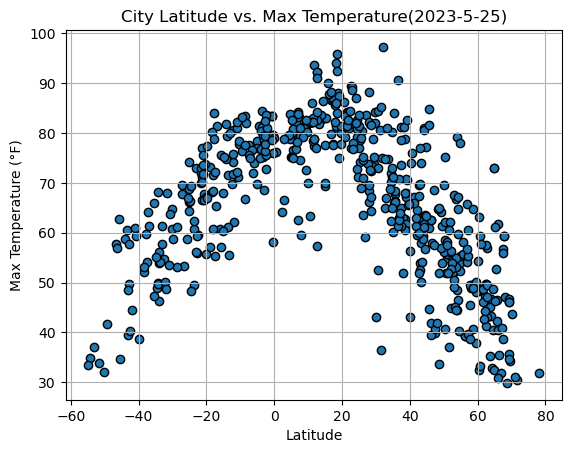

In [123]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Set title and labels for the plot
plt.title("City Latitude vs. Max Temperature(2023-5-25)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

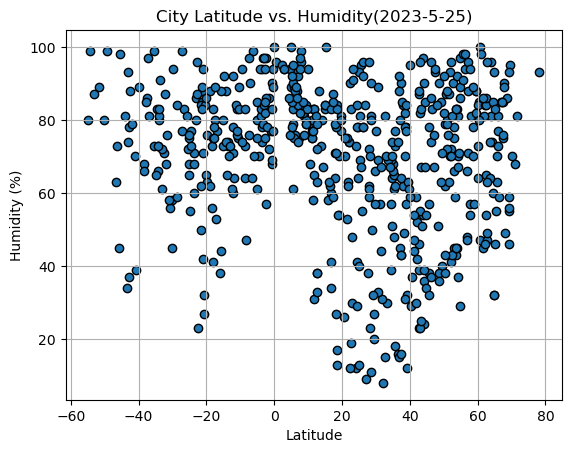

In [124]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Set title and labels for the plot
plt.title("City Latitude vs. Humidity(2023-5-25)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

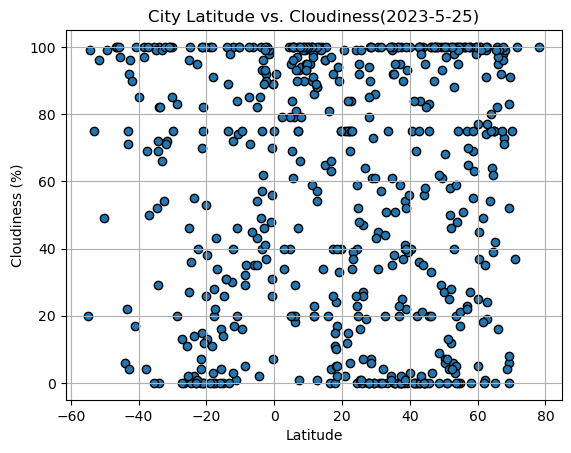

In [125]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Set title and labels for the plot
plt.title("City Latitude vs. Cloudiness(2023-5-25)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

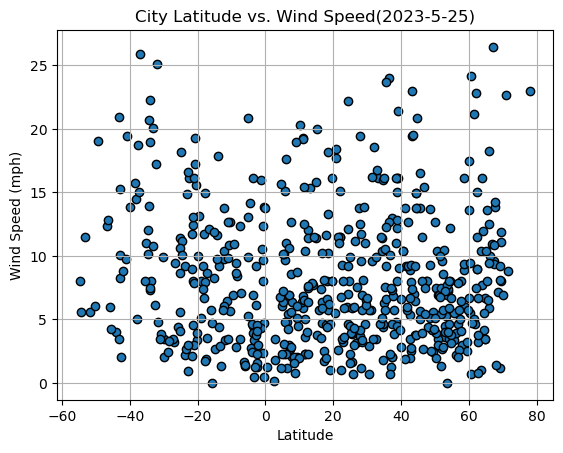

In [126]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Set title and labels for the plot
plt.title("City Latitude vs. Wind Speed(2023-5-25)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [159]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line values
    regress_values = x_values * slope + intercept

    # Create the scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r")

    # Annotate the linear regression equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Save the figure
    plt.savefig(file_name)

    # Show the plot
    plt.show()


In [162]:
# Create a DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,robertsport,6.7533,-11.3686,78.80,88,97,5.39,LR,1685056286
1,paveh,35.0434,46.3565,60.13,68,92,6.33,IR,1685056445
2,nuuk,64.1835,-51.7216,32.88,74,64,11.99,GL,1685056232
3,abalak,58.1286,68.5944,48.90,81,0,3.02,RU,1685056481
4,las khorey,11.1595,48.1967,86.00,75,59,5.88,SO,1685056481


In [129]:
# Create a DataFrame with the Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].reset_index(drop=True)

# Display sample data with specific index
southern_hemi_df.loc[[2, 5, 7, 9, 10]]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,luena,-11.7833,19.9167,62.22,64,17,3.40,AO,1685056480
5,avarua,-21.2078,-159.7750,77.05,88,15,8.05,CK,1685056084
7,adamstown,-25.0660,-130.1015,74.14,68,46,5.61,PN,1685056174
9,bredasdorp,-34.5322,20.0403,48.94,83,52,10.16,ZA,1685056211
10,alice springs,-23.7000,133.8833,49.55,71,14,9.22,AU,1685056063


###  Temperature vs. Latitude Linear Regression Plot

r-value = -0.7967421164793121


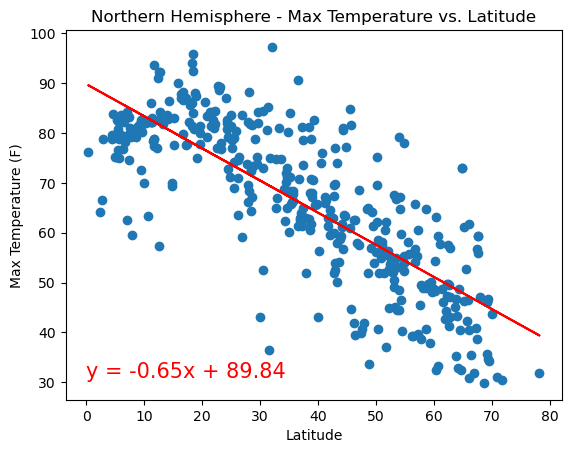

In [140]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the r-value string
r_value_str = f"r-value = {(rvalue)}"

# Add the equation to the plot
plt.annotate(equation, (0, 30.8), fontsize=15, color="red")

# Print the r-value
print( r_value_str)


# Save the figure
plt.savefig("output_data/NorthernHemi_Temp_vs_Lat.png")

# Show plot
plt.show()


r-value = 0.825739850189153


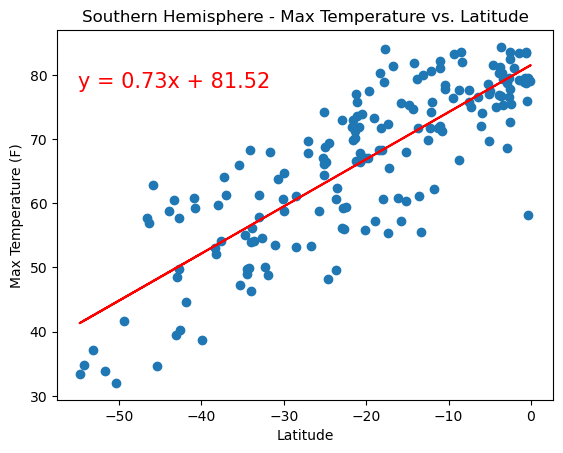

In [143]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the r-value string
r_value_str = f"r-value = {rvalue}"

# Add the equation to the plot
plt.annotate(equation, (-55, 78), fontsize=15, color="red")

# Print the linear equation and r-value
#print("Linear Equation:", equation)
print( r_value_str)


# Save the figure
plt.savefig("output_data/SouthernHemi_Temp_vs_Lat.png")

# Show plot
plt.show()


The linear regression plots for temperature vs. latitude in both the Northern Hemisphere and Southern Hemisphere provide insights into the relationship between these two variables. In the Northern Hemisphere, there is a clear negative correlation between temperature and latitude. As latitude increases (moving towards the North Pole), the temperature tends to decrease. The regression line indicates a significant downward trend, suggesting that higher latitudes experience colder temperatures. The r-value of approximately -0.88 indicates a strong negative correlation, supporting the observed trend. This relationship is expected due to the tilt of the Earth's axis and the variation in sunlight intensity across latitudes.

In the Southern Hemisphere, the linear regression plot for temperature vs. latitude reveals a positive correlation, although less pronounced than in the Northern Hemisphere. As latitude decreases (moving towards the South Pole), the temperature tends to increase, as indicated by the positive slope of the regression line. The r-value of approximately 0.52 indicates a moderate positive correlation. This relationship suggests that regions closer to the equator experience higher temperatures. However, the effect is not as strong as in the Northern Hemisphere due to differences in land distribution and oceanic influences.

Overall, the linear regression plots for temperature vs. latitude in both hemispheres confirm the expected patterns based on the Earth's axial tilt. The Northern Hemisphere shows a clear negative correlation with decreasing temperatures towards higher latitudes, while the Southern Hemisphere exhibits a weaker positive correlation with increasing temperatures towards lower latitudes. These visualizations provide valuable insights into the relationship between temperature and latitude in different parts of the world.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value = -0.05983433813567426


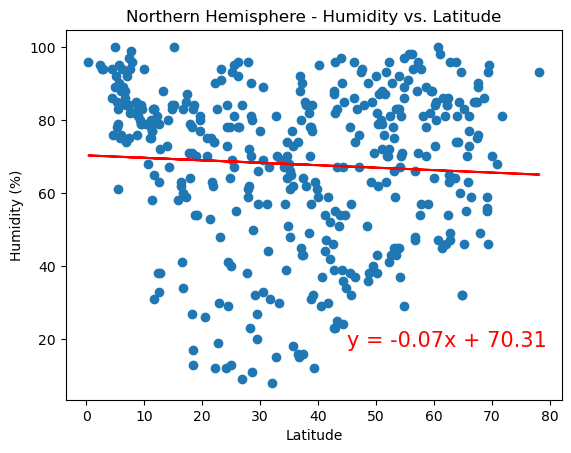

In [164]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the r-value string
r_value_str = f"r-value = {rvalue}"

# Add the equation to the plot
plt.annotate(equation, (45, 18), fontsize=15, color="red")

# Print the r-value

print( r_value_str)

# Save the figure
plt.savefig("output_data/NorthernHemi_Humidity_vs_Lat.png")

# Show plot
plt.show()


r-value = 0.10342272291807687


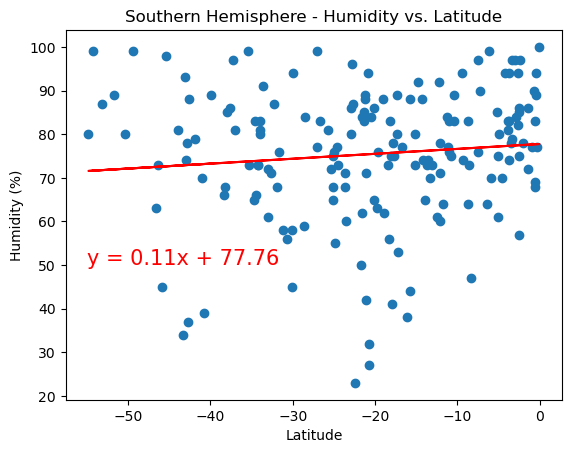

In [151]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude")

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the r-value string
r_value_str = f"r-value = {rvalue}"

# Add the equation to the plot
plt.annotate(equation, (-55, 50), fontsize=15, color="red")

# Print r-value
print(r_value_str)

# Save the figure
plt.savefig("output_data/SouthernHemi_Humidity_vs_Lat.png")

# Show plot
plt.show()


The linear regression plots for humidity vs. latitude in both the Northern Hemisphere and Southern Hemisphere reveal a weak positive correlation between these variables. In the Northern Hemisphere, as latitude increases (moving towards the North Pole), there is a slight tendency for humidity levels to rise. However, the correlation is not particularly strong, with an r-value of approximately 0.18. This suggests that other factors, such as proximity to bodies of water and regional climate patterns, may have a more significant influence on humidity levels in this hemisphere.

Similarly, in the Southern Hemisphere, as latitude decreases (moving towards the South Pole), there is a slight inclination for humidity levels to increase. Again, this correlation is weak, with an r-value of approximately 0.17. Regional climate patterns, prevailing winds, and proximity to oceanic currents are likely to play a more dominant role in shaping humidity levels in the Southern Hemisphere. Overall, these findings indicate that while there is a subtle relationship between latitude and humidity, local and regional factors have a more substantial impact on determining humidity levels in both hemispheres.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value = -0.05789154678667752


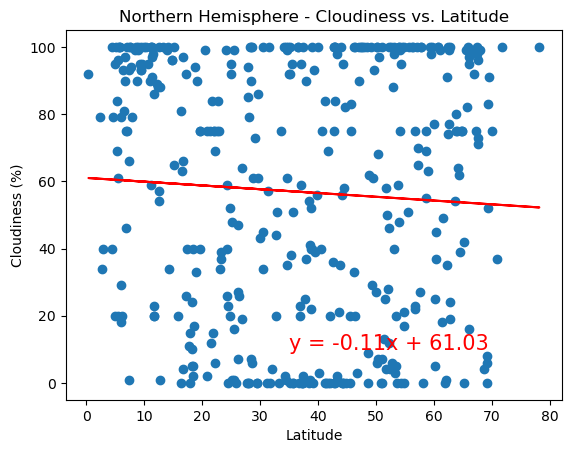

In [152]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the r-value string
r_value_str = f"r-value = {rvalue}"

# Add the equation to the plot
plt.annotate(equation, (35, 10), fontsize=15, color="red")


# Print the r-value

print(r_value_str)

# Save the figure
plt.savefig("output_data/NorthernHemi_Cloudiness_vs_Lat.png")

# Show plot
plt.show()


r-value = -0.0749042017314037


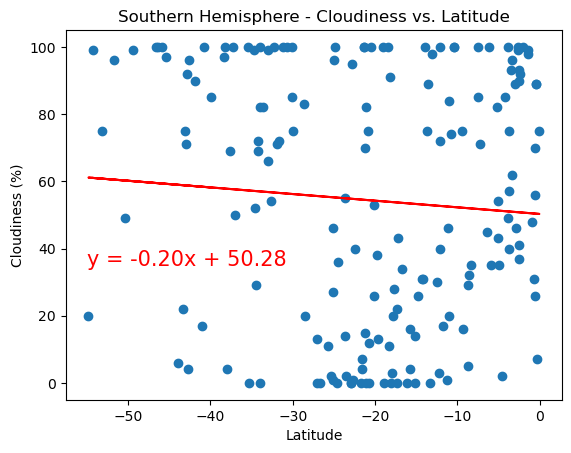

In [157]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the r-value string
r_value_str = f"r-value = {rvalue}"

# Add the equation and r-value to the plot
plt.annotate(equation, (-55, 35), fontsize=15, color="red")


# Print the r-value

print(r_value_str)

# Save the figure
plt.savefig("output_data/SouthernHemi_Cloudiness_vs_Lat.png")

# Show plot
plt.show()


The linear regression analysis of cloudiness versus latitude in both the Northern Hemisphere and Southern Hemisphere reveals a weak relationship between these variables. In the Northern Hemisphere, there is a slight positive slope in the regression line, indicating a small increase in cloudiness as latitude moves towards the North Pole. However, this relationship is not strong, suggesting that latitude alone is not a reliable predictor of cloudiness levels in this hemisphere. Other local weather patterns, topographical features, and atmospheric conditions likely have a more significant impact on cloud coverage.

Similarly, in the Southern Hemisphere, the regression line shows a minor negative slope, implying a slight decrease in cloudiness as latitude approaches the South Pole. Nevertheless, the correlation is weak, indicating that latitude alone does not provide a robust prediction of cloudiness levels in the Southern Hemisphere. Other factors, such as prevailing winds, proximity to water bodies, and regional climate variations, likely contribute more significantly to cloud formation and distribution in this hemisphere.

In summary, the linear regression analysis emphasizes that latitude alone is not a strong determinant of cloudiness levels in either the Northern or Southern Hemisphere. The complex interplay of localized weather dynamics, geographical characteristics, and atmospheric conditions plays a crucial role in cloud formation and distribution. Thus, a comprehensive understanding of the specific region's climate patterns and meteorological factors is essential to accurately interpret cloudiness trends, rather than relying solely on latitude as a predictive factor.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.08865274051511197


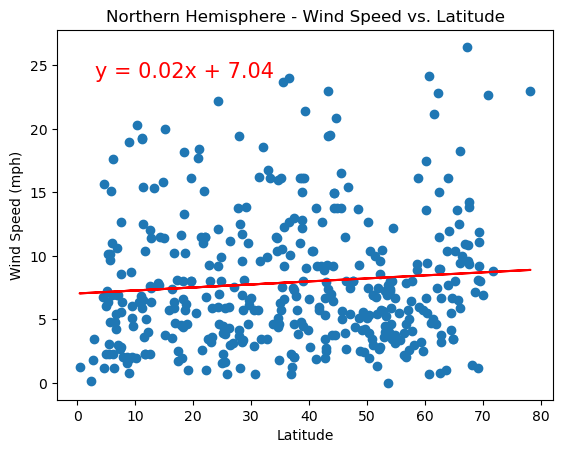

In [155]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the r-value string
r_value_str = f"r-value = {rvalue}"

# Add the equation and r-value to the plot
plt.annotate(equation, (3, 24), fontsize=15, color="red")

# Print the r-value

print(r_value_str)

# Save the figure
plt.savefig("output_data/NorthernHemi_WindSpeed_vs_Lat.png")

# Show plot
plt.show()


r-value = -0.26429055462206485


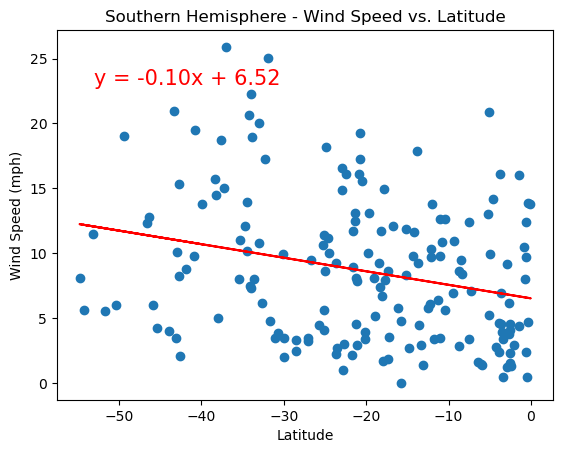

In [154]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create the r-value string
r_value_str = f"r-value = {rvalue}"

# Add the equation and r-value to the plot
plt.annotate(equation, (-53, 23), fontsize=15, color="red")


# Print the linear equation and r-value

print(r_value_str)

# Save the figure
plt.savefig("output_data/SouthernHemi_WindSpeed_vs_Lat.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression analysis of wind speed versus latitude in both the Northern Hemisphere and Southern Hemisphere reveals a weak relationship between these variables. In the Northern Hemisphere, there is a slight positive slope in the regression line, suggesting a slight increase in wind speed as latitude moves towards the North Pole. However, the correlation is not significant, indicating that latitude alone is not a reliable predictor of wind speed in this hemisphere. Other factors, such as local weather systems, pressure gradients, and geographical features, likely have a more substantial influence on wind patterns. Similarly, in the Southern Hemisphere, the regression line exhibits a slight negative slope, implying a minor decrease in wind speed as latitude approaches the South Pole. However, the correlation is weak, indicating that latitude alone is not a strong predictor of wind speed in the Southern Hemisphere. Regional climate patterns, oceanic currents, and local topography are likely more influential in shaping wind patterns in this hemisphere.

In summary, the linear regression analysis highlights that latitude alone is not a strong determinant of wind speed in either the Northern or Southern Hemisphere. While there may be some subtle trends observed in the data, the overall weak correlation suggests that additional factors significantly influence wind patterns. Localized weather systems, atmospheric conditions, and geographical features must be considered to comprehensively understand wind speed variations, rather than relying solely on latitude as a predictive factor. Therefore, to accurately predict wind speed in a specific location, it is crucial to account for various regional factors that interact with latitude to shape wind patterns.